<a href="https://colab.research.google.com/github/FrancisBacon95/Classification-of-ECG-signals/blob/master/04_Classification_of_ECG_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict

# 1. 데이터 분포 확인

In [ ]:
path="./gdrive/My Drive/Colab Notebooks/(록스)mitbih_database"
#path="./(록스)mitbih_database/"
classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=='csv':
        records.append(path+"/"+f)
records.sort()
annotations.sort()
#display(records)
#display(annotations)

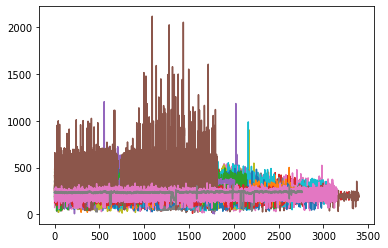

In [ ]:
avg_list=[]
names=[]
for i in range(len(annotations)):
    names.append(annotations[i].split('/')[-1].split('.')[0].split('a')[0])
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    a_list=[]
    for i in range(3,len(lines)):
        now=list(filter(None,lines[i].split(" ")))[1]
        before=list(filter(None,lines[i-1].split(" ")))[1]
        a_list.append(int(now)-int(before))

    plt.plot(range(0,len(a_list)),a_list)

    a_array=np.array(a_list)
    avg=np.mean(a_array)
    avg_list.append(avg)

■■■ 인원별 평균 비트의 길이 : 287.324873424873 ■■■


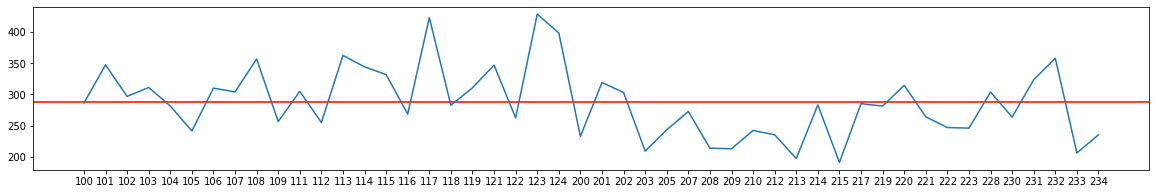

In [ ]:
print("■■■ 인원별 평균 비트의 길이 :",sum(avg_list)/len(avg_list),"■■■")
plt.figure(figsize=(20, 3))
plt.axhline(y=sum(avg_list)/len(avg_list), xmin=0, xmax=1,color='red')
plt.plot(names,avg_list)

In [ ]:
person_aux_detection=defaultdict(int)
class_aux_dectection=defaultdict(int)

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
#maximum_counting=10000
X,Y=[],[]

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    a=[]
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for j in range(3,len(lines)): # 1번 ~ 2번: 시작 지점이라 이상함
        now_tmp=list(filter(None,lines[j].split(" ")))
        # AUX 부분에 이상한 것 있으면 확인
        if now_tmp[-1] != '0\n':
            #print(records[i],":",now_tmp[-1].split("\t")[1])
            person_aux_detection[records[i].split('/')[-1].split('.')[0]]+=1
            class_aux_dectection[now_tmp[-1].split("\t")[1]]+=1
        before_tmp=list(filter(None,lines[j-1].split(" ")))
        now_num_sample=int(now_tmp[1])
        before_num_sample=int(before_tmp[1])
        beat_type=now_tmp[2]
        if (beat_type in classes):
            beat_idx=classes.index(beat_type)
            count_classes[beat_idx]+=1
            beat=signals[before_num_sample:now_num_sample]
            X.append(beat)
            Y.append(beat_idx)

102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


In [ ]:
print(len(X))
print(len(Y))

103371
103371


In [ ]:
df_class_aux_dectection = pd.DataFrame([(k.split('\n')[0],v) for k,v in class_aux_dectection.items()],columns=['class','aux_num'])
df_person_aux_detection = pd.DataFrame([(k, v) for k, v in person_aux_detection.items()], columns=['id', 'aux_num'])
display(df_class_aux_dectection)
display(df_person_aux_detection)

,class,aux_num
0,(B,219
1,(N,470
2,(VT,61
3,(T,83
4,(SVTA,26
5,(NOD,36
6,(IVR,4
7,(AFIB,102
8,(AFL,45
9,(VFL,6


,id,aux_num
0,106,40
1,114,2
2,119,102
3,124,12
4,200,147
5,201,34
6,202,7
7,203,44
8,205,12
9,207,23


In [ ]:
print("전체 X 값 :",len(X))
print("Aux 값 찍힌곳 :",sum(list(df_class_aux_dectection.iloc[:,1])))
print("비율 :",round((sum(list(df_class_aux_dectection.iloc[:,1]))/len(X))*100,2))

전체 X 값 : 103371
Aux 값 찍힌곳 : 1632
비율 : 1.58


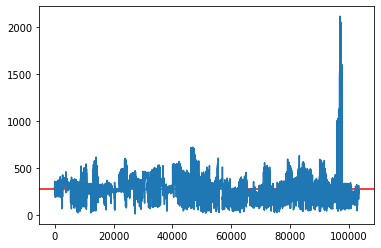

In [ ]:
X_len=[len(x) for x in X]
plt.axhline(y=sum(X_len)/len(X_len), xmin=0, xmax=1, color='red')
plt.plot(range(0,len(X_len)),X_len)

데이터의 개수 103371
평균 280.57439707461475
분산 6399.240063453944
표준 편차 79.9952502555867
최대값 2114
최소값 11
중앙값 270.0
1사분위 233.0
2사분위 270.0
3사분위 322.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1 시그마 적용: 0.730407948070542
2 시그마 적용: 0.9619429046831316


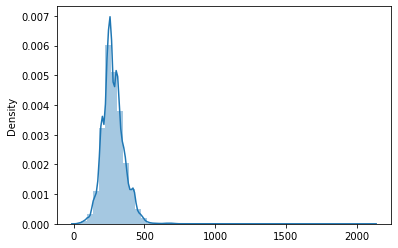

In [ ]:
import seaborn as sns
len_x=[len(x) for x in X]

print("데이터의 개수",len(len_x)) # 데이터의 개수
print("평균",np.mean(len_x)) # 평균
print("분산",np.var(len_x)) # 분산
print("표준 편차",np.std(len_x)) # 표준 편차
print("최대값",np.max(len_x)) # 최대값
print("최소값",np.min(len_x)) # 최소값
print("중앙값",np.median(len_x)) # 중앙값
print("1사분위",np.percentile(len_x, 25)) # 1사분위 수
print("2사분위",np.percentile(len_x, 50)) # 2사분위 수 = 중앙값
print("3사분위",np.percentile(len_x, 75)) # 3사분위 수

sns.distplot(len_x)

upper=np.mean(len_x)+np.std(len_x)
lower=np.mean(len_x)-np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1

print("1 시그마 적용:",cnt/len(len_x))
upper=np.mean(len_x)+2*np.std(len_x)
lower=np.mean(len_x)-2*np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1
print("2 시그마 적용:",cnt/len(len_x))

## 결론
### 1) 2시그마 범위 안에 97%가 포함되므로 비트 단위를 mean + 2sigma로 표현한다.
### 2) window size/2를 mean+2sigma로 활용한다.

In [ ]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        print(classes[Y[i]])
print(np.shape(X))

(103371,) (103371,)
N
A
V
/
L
R
(103371,)


# 2. 데이터 전처리

In [ ]:
window_size = int((np.mean(len_x)+2*np.std(len_x))/2)
print("window size: ",window_size)
maximum_counting = 100000

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=="csv":
        records.append(path+"/"+f)
annotations.sort()
records.sort()

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for line in lines[1:]: #lines의 0은 Header
        tmp=line.split(' ')
        tmp=filter(None, tmp)
        next(tmp)
        pos=int(next(tmp))
        arrhythmia_type=next(tmp)
        if (arrhythmia_type in classes):
            arrhythmia_index=classes.index(arrhythmia_type)
            if count_classes[arrhythmia_index]> maximum_counting:
                continue
            else:
                count_classes[arrhythmia_index]+=1
                if (window_size<pos and pos<(len(signals)-window_size)): 
                    beat=signals[pos-window_size+1:pos+window_size] #beat size
                    X.append(beat)
                    Y.append(arrhythmia_index)

window size:  220
102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


## 2-1. 데이터 shape

(103345, 439) (103345,)
N
A
V
/
L
R


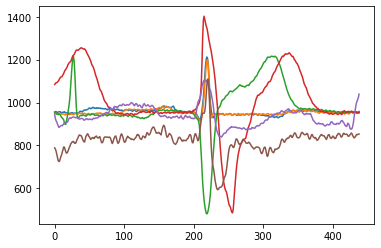

In [ ]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        plt.plot(X[i])
        print(classes[Y[i]])

In [ ]:
# X 배열 끝에 Y값 삽입
for i in range(len(X)):
    X[i].append(Y[i])
    
X_train_df = pd.DataFrame(X)
#각각의 beat type의 count
per_class=X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class) #V5 포함했을 때와 비교했을 때 '5'의 카운트가 크게 차이남

0    74737
1     8070
2     7253
4     7122
5     3618
3     2545
Name: 439, dtype: int64


## 2-2. Resampling
### 5000 이상 : 중복 X   // 5000 이하 : 중복 O

In [ ]:
from sklearn.utils import resample

resampled_X_train_df=pd.DataFrame()
for name, group in X_train_df.groupby(X_train_df[X_train_df.shape[1]-1]):
    if len(group)>5000:
        tmp=resample(group,replace=False,n_samples=5000, random_state=880818)
    else:
        tmp=resample(group,replace=True, n_samples=5000, random_state=880818)
    print(len(tmp))
    resampled_X_train_df=pd.concat([resampled_X_train_df,tmp])
print(len(resampled_X_train_df))
resampled_X_train_df

5000
5000
5000
5000
5000
5000
30000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
100823,949,945,942,941,941,936,940,943,945,945,947,945,946,945,944,939,936,938,938,941,944,944,944,945,945,944,944,940,938,937,938,939,943,946,948,947,947,945,943,942,...,957,960,962,964,964,966,969,973,977,978,979,981,985,986,984,982,983,984,982,981,982,978,974,971,967,961,959,957,955,954,951,947,945,942,937,937,936,934,936,0
99672,1125,1133,1135,1139,1141,1142,1144,1149,1149,1153,1158,1164,1167,1174,1177,1185,1187,1190,1192,1193,1196,1198,1198,1202,1205,1206,1205,1202,1197,1194,1189,1182,1179,1173,1169,1161,1158,1152,1145,1138,...,1016,1009,1006,1001,997,990,990,990,990,994,997,997,998,996,996,997,998,999,1000,999,999,1010,1018,1037,1065,1101,1142,1185,1222,1255,1287,1314,1338,1353,1356,1345,1325,1290,1244,0
27975,853,857,857,860,864,867,871,875,881,888,891,897,899,904,910,911,913,917,920,925,931,935,942,945,947,947,947,947,940,937,936,932,930,929,926,926,919,910,900,891,...,775,772,770,776,776,780,780,783,783,783,786,782,775,773,774,775,770,772,772,779,780,784,787,788,792,794,795,797,798,803,804,807,805,805,802,805,807,811,812,0
86694,1054,1040,1005,954,912,884,875,882,897,909,914,910,906,905,904,906,906,906,905,903,907,910,911,906,902,900,901,906,908,905,902,905,910,912,909,908,905,902,906,910,...,967,964,956,955,955,959,955,954,952,952,957,962,963,964,967,971,972,980,978,974,972,969,971,971,974,973,973,976,980,982,980,971,966,965,968,970,967,967,968,0
21718,818,817,816,813,814,814,815,817,818,816,818,815,812,813,813,809,810,812,814,813,814,813,814,813,811,810,808,806,806,806,807,806,807,806,806,806,803,801,800,803,...,850,852,855,854,857,856,854,852,852,851,849,847,848,851,853,859,864,866,867,869,871,872,869,871,870,868,869,872,875,880,882,881,878,872,869,863,861,858,860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76899,1151,1153,1149,1160,1168,1170,1169,1167,1170,1174,1181,1180,1181,1186,1187,1195,1200,1205,1206,1208,1210,1216,1222,1225,1224,1226,1229,1233,1235,1236,1236,1234,1233,1233,1236,1237,1231,1233,1230,1228,...,1001,1002,997,995,993,991,997,997,993,988,992,992,993,990,987,986,984,985,987,986,983,979,980,982,984,983,980,978,979,981,985,985,982,982,983,985,988,985,982,5
78270,1041,1039,1043,1048,1054,1052,1052,1049,1057,1063,1068,1070,1069,1073,1076,1080,1086,1085,1091,1093,1100,1107,1116,1121,1125,1128,1139,1146,1156,1160,1163,1168,1172,1178,1184,1188,1188,1197,1199,1206,...,977,974,971,969,969,971,975,973,970,966,969,970,970,969,968,963,964,964,967,962,960,958,957,956,957,957,953,953,952,955,957,960,957,958,961,964,962,962,957,5
12208,1167,1174,1180,1185,1190,1197,1205,1211,1219,1222,1229,1235,1244,1251,1256,1261,1265,1270,1274,1281,1284,1286,1290,1295,1300,1302,1303,1303,1305,1306,1310,1314,1318,1318,1318,1322,1322,1322,1319,1315,...,935,935,937,939,940,935,935,936,938,937,935,935,933,933,939,940,939,937,936,939,939,940,938,940,937,936,942,944,945,945,942,940,941,943,944,945,944,944,943,5
12072,988,994,1001,1007,1012,1012,1013,1018,1019,1018,1024,1034,1042,1049,1055,1058,1063,1072,1079,1083,1093,1096,1100,1103,1104,1107,1110,1114,1116,1121,1128,1131,1139,1139,1136,1134,1136,1142,1143,1143,...,875,877,881,884,888,886,889,888,891,898,904,905,914,921,928,932,935,932,929,931,936,949,954,946,937,926,921,925,928,935,939,937,937,940,940,938,937,932,924,5


# 3. Modeling

## 3-1. Set 분할

각 beat type별로 균등하게 Set 분할 실시

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

train, test=train_test_split(resampled_X_train_df,test_size=0.20)
print("X_train : ",len(train))
print("X_test : ",len(test))
print(type(test))
test.iloc[:,-1].value_counts()
test

X_train :  24000
X_test :  6000
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
81972,922,918,910,907,904,900,899,898,894,893,893,891,890,890,889,888,887,887,887,889,889,890,890,890,890,889,889,889,892,891,897,898,900,900,900,902,901,902,900,902,...,901,902,901,902,900,900,900,901,898,895,896,894,895,894,897,897,899,898,896,895,891,891,888,889,888,887,889,886,888,889,888,887,885,882,882,881,881,878,882,0
86684,888,891,894,894,893,894,892,892,896,900,904,901,902,897,896,900,901,903,907,908,916,919,920,916,911,906,905,907,918,943,968,1005,1048,1098,1156,1196,1216,1203,1157,1096,...,1189,1140,1076,1021,991,983,990,1008,1021,1028,1030,1028,1029,1025,1024,1028,1034,1040,1042,1043,1041,1040,1041,1039,1034,1027,1022,1024,1032,1043,1043,1042,1033,1028,1033,1041,1041,1039,1035,3
36815,861,862,863,860,858,859,860,858,857,857,857,859,859,859,858,861,861,858,857,854,854,856,856,857,857,861,859,858,858,858,855,853,854,857,856,856,860,861,861,861,...,862,861,859,856,854,856,858,858,861,863,864,864,863,859,858,858,854,855,857,861,862,863,863,861,860,860,861,859,859,860,860,862,860,864,866,866,865,862,860,0
77554,1186,1192,1194,1193,1193,1196,1203,1212,1218,1220,1221,1223,1222,1230,1231,1231,1231,1231,1233,1237,1237,1233,1231,1229,1229,1230,1228,1224,1219,1214,1214,1215,1211,1206,1196,1192,1187,1183,1178,1171,...,980,977,978,980,980,980,974,971,973,975,973,971,969,972,972,977,976,974,970,970,973,976,977,974,969,970,971,975,975,973,967,965,963,962,962,958,956,955,961,5
96607,990,990,990,988,985,985,985,985,985,986,985,985,983,984,984,986,985,986,987,987,990,990,993,995,998,998,997,996,995,997,995,997,995,999,1003,1006,1009,1012,1013,1014,...,977,980,981,985,986,988,987,984,980,980,983,983,983,980,980,978,980,980,981,982,985,987,988,986,987,984,980,979,976,976,975,978,976,981,980,979,979,979,979,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98583,1319,1346,1366,1364,1354,1325,1277,1210,1140,1076,1029,1000,985,985,981,984,979,970,962,952,946,943,943,949,950,953,948,948,944,943,941,939,938,937,939,940,939,940,942,940,...,968,964,962,962,966,967,968,968,969,970,971,969,969,963,963,962,959,965,978,998,1029,1066,1106,1147,1185,1221,1254,1288,1317,1338,1352,1352,1341,1314,1262,1196,1121,1059,1013,0
34699,798,799,798,795,793,791,791,795,794,796,799,797,798,792,789,782,780,794,820,860,913,980,1054,1133,1197,1235,1256,1252,1225,1172,1090,985,880,801,770,778,804,830,843,843,...,756,753,755,756,760,761,763,764,765,760,761,755,758,758,757,754,756,760,762,765,765,765,764,761,759,757,759,763,762,763,765,767,767,764,759,759,761,759,760,4
77833,935,934,937,937,935,930,926,926,926,928,924,920,915,913,914,912,904,898,891,888,889,888,882,871,864,862,858,854,848,841,836,834,833,833,831,826,824,823,827,832,...,984,985,982,982,983,985,980,977,973,976,978,981,976,972,974,975,980,982,978,978,975,973,976,977,974,972,970,970,972,974,976,973,971,969,972,973,970,966,964,5
32833,789,790,786,787,785,788,790,793,792,791,788,788,790,791,787,792,795,800,805,813,816,816,821,820,829,831,836,840,843,850,855,861,861,865,865,863,864,863,865,868,...,869,871,874,876,875,876,877,874,872,874,872,873,876,877,875,878,877,875,873,871,873,872,871,871,872,877,880,882,880,880,879,877,876,877,881,878,885,891,893,2


In [ ]:
cate=resampled_X_train_df.groupby(439)
train=pd.DataFrame([],columns=resampled_X_train_df.columns)
test=pd.DataFrame([],columns=resampled_X_train_df.columns)

for i in range(len(classes)):
  tmp_df=cate.get_group(i)
  tmp_train, tmp_test=train_test_split(tmp_df,test_size=0.20)
  train=pd.concat([train,tmp_train])
  test=pd.concat([test,tmp_test])
test.iloc[:,-1].value_counts()
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
21655,834,836,838,831,833,833,830,831,831,829,826,828,830,830,831,830,828,827,823,822,821,821,821,820,824,823,825,821,819,820,817,817,817,815,818,820,819,819,821,821,...,870,870,869,868,869,871,870,872,874,876,877,876,879,878,877,878,879,881,882,883,884,890,893,893,893,895,892,891,894,892,892,889,888,885,886,882,878,877,875,0
24636,1041,1040,1037,1033,1034,1035,1037,1036,1033,1031,1034,1033,1035,1033,1029,1028,1028,1032,1031,1027,1024,1025,1027,1031,1029,1030,1027,1026,1028,1027,1029,1027,1025,1025,1026,1030,1031,1029,1026,1027,...,1021,1023,1021,1023,1019,1017,1019,1017,1019,1020,1020,1018,1021,1021,1020,1019,1014,1014,1018,1019,1019,1016,1015,1012,1017,1021,1022,1019,1017,1018,1018,1020,1018,1016,1009,1010,1013,1016,1018,0
73385,954,957,961,966,970,971,964,962,962,962,961,963,960,956,959,963,968,966,962,957,957,963,976,999,1032,1066,1098,1125,1150,1165,1168,1156,1128,1095,1054,991,924,870,842,843,...,1143,1103,1069,1019,950,884,841,830,845,871,897,912,929,939,944,946,951,957,959,960,964,968,975,979,979,974,971,975,985,987,985,979,977,979,992,998,998,998,995,0
34211,919,920,921,921,922,924,926,927,926,931,935,934,935,938,938,934,935,933,927,925,925,921,917,916,917,913,905,901,894,889,889,885,882,880,881,876,877,874,872,870,...,1162,1211,1258,1306,1350,1386,1417,1443,1456,1464,1464,1459,1444,1429,1415,1392,1383,1378,1382,1386,1390,1382,1365,1337,1306,1268,1228,1175,1108,1025,946,879,837,818,815,818,820,823,812,0
20934,860,861,863,864,864,865,862,862,859,856,857,855,857,858,859,858,859,857,858,859,855,852,852,853,851,853,852,854,856,852,852,854,851,850,849,849,848,846,850,849,...,893,895,897,898,897,898,899,898,897,901,901,904,904,906,903,904,904,906,905,905,904,906,905,906,904,903,900,896,895,892,889,886,884,884,884,883,883,879,878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77776,1146,1152,1158,1165,1169,1173,1174,1181,1187,1192,1195,1194,1195,1198,1203,1204,1206,1204,1203,1204,1205,1207,1199,1193,1189,1187,1184,1182,1175,1166,1156,1150,1149,1142,1134,1121,1114,1110,1102,1093,...,956,956,952,953,954,955,956,952,949,952,955,953,954,949,947,949,949,949,947,943,939,936,939,938,936,936,934,938,940,943,941,937,938,937,942,946,943,940,937,5
12693,1105,1111,1117,1125,1132,1143,1154,1162,1171,1182,1195,1206,1215,1222,1232,1242,1251,1257,1257,1255,1252,1252,1256,1264,1270,1273,1276,1279,1280,1283,1283,1282,1279,1276,1275,1275,1272,1268,1264,1257,...,949,952,950,947,947,946,948,950,950,948,946,946,948,951,951,949,948,949,950,951,952,952,952,950,952,954,953,955,952,952,952,954,952,951,951,950,951,951,949,5
77845,1028,1035,1038,1042,1044,1041,1047,1053,1056,1058,1057,1059,1065,1075,1082,1084,1088,1089,1093,1101,1111,1115,1114,1121,1127,1132,1138,1141,1140,1142,1145,1152,1158,1160,1154,1156,1156,1157,1156,1153,...,951,949,952,952,955,957,952,950,948,951,955,952,945,943,943,946,947,947,943,937,939,943,945,947,946,947,949,954,954,951,945,946,947,949,951,948,945,943,943,5
12869,1114,1118,1124,1125,1133,1140,1146,1151,1156,1159,1165,1172,1178,1183,1187,1187,1189,1196,1198,1202,1202,1203,1201,1202,1202,1202,1201,1197,1195,1192,1189,1185,1179,1173,1168,1163,1158,1149,1141,1131,...,893,890,884,876,868,857,853,852,851,848,842,835,835,844,854,867,877,881,882,875,859,831,796,767,752,747,734,720,703,689,683,689,691,690,686,684,695,716,736,5


In [ ]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print("Y shape :",np.shape(y_train),np.shape(y_test))

x_train=train.iloc[:,:train.shape[1]-1].values
x_test=test.iloc[:,:test.shape[1]-1].values
x_train=x_train.reshape(len(x_train),x_train.shape[1],1)
x_test=x_test.reshape(len(x_test),x_test.shape[1],1)
print("X shape :",np.shape(x_train),np.shape(x_test))

Y shape : (24000, 6) (6000, 6)
X shape : (24000, 439, 1) (6000, 439, 1)


## 3-2. 모델 학습

In [ ]:
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix

In [ ]:
x_test=x_test.reshape(len(x_test),x_test.shape[1])
display(np.shape(x_test))

x_train=x_train.reshape(len(x_train),x_train.shape[1])
np.shape(x_train)

(6000, 439)

(24000, 439)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(x_train))
x_train = minMaxScaler.transform(x_train)
x_test = minMaxScaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [ ]:
def network(x_train,y_train,x_test,y_test):
    im_shape=(x_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape),name='inputs_cnn')
    
    #conv. layer 1
    conv1_1=Convolution1D(64,(6),activation="elu",input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    #pooling layer 1
    pool1=MaxPool1D(pool_size=(3),strides=(2),padding="same")(conv1_1)
    #conv. layer 2
    conv2_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    #conv. layer 3
    conv3_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(conv2_1)
    conv3_1=BatchNormalization()(conv3_1)
    #pooling layer 2
    pool2=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv3_1)
    #conv. layer 4
    conv4_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(pool2)
    conv4_1=BatchNormalization()(conv4_1)
    #conv. layer 5
    conv5_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(conv4_1)
    conv5_1=BatchNormalization()(conv5_1)
    #pooling layer 3
    pool3=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv5_1)
    #flattened layer 1
    flatten=Flatten()(pool3)
    #dense layers
    dense_end1=Dense(1024,activation='elu')(flatten)
    
    #output layers
    main_output=Dense(6,activation='softmax',name='main_output')(dense_end1)
    
    model=Model(inputs=inputs_cnn,outputs=main_output)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', precision, recall, f1score])
    
    callbacks=[EarlyStopping(monitor='val_loss',patience=2),
              ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]
    
    history=model.fit(x_train, y_train, epochs=10, callbacks=callbacks, batch_size=32,validation_data=(x_test,y_test))
    model.load_weights('best_model.h5')
    return (model, history)

In [ ]:
def evaluate_model(history, X_test, y_test, model) :
    scores = model.evaluate((X_test), y_test, verbose = 0)
    print("Accuracy : %.2f%%" % (scores[1]*100))
    print("Accuracy : %.2f%%" % (scores[-1]*100))
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc = 'upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_name = ['0', '1', '2', '3', '4', '5']
    
    y_true = []
    for element in y_test :
        y_true.append(np.argmax(element))
    prediction_proba = model.predict(X_test)
    prediction = np.argmax(prediction_proba, axis = 1)
    cnf_matrix = confusion_matrix(y_true, prediction)

## 3-3. 모델 평가

### 1) Accuracy, F1 Score 평가

In [ ]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

Epoch 1/10
750/750 [==============================] - 319s 425ms/step - loss: 0.3900 - accuracy: 0.9302 - precision: 0.9355 - recall: 0.9257 - f1score: 0.9304 - val_loss: 0.3746 - val_accuracy: 0.9058 - val_precision: 0.9098 - val_recall: 0.9041 - val_f1score: 0.9069
Epoch 2/10
750/750 [==============================] - 319s 426ms/step - loss: 0.1269 - accuracy: 0.9644 - precision: 0.9662 - recall: 0.9630 - f1score: 0.9646 - val_loss: 0.2740 - val_accuracy: 0.9290 - val_precision: 0.9313 - val_recall: 0.9269 - val_f1score: 0.9290
Epoch 3/10
750/750 [==============================] - 319s 425ms/step - loss: 0.1018 - accuracy: 0.9730 - precision: 0.9743 - recall: 0.9722 - f1score: 0.9732 - val_loss: 0.1194 - val_accuracy: 0.9683 - val_precision: 0.9694 - val_recall: 0.9659 - val_f1score: 0.9676
Epoch 4/10
750/750 [==============================] - 319s 425ms/step - loss: 0.0916 - accuracy: 0.9759 - precision: 0.9766 - recall: 0.9752 - f1score: 0.9759 - val_loss: 9.6152 - val_accuracy: 0.

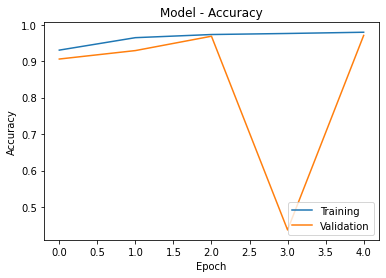

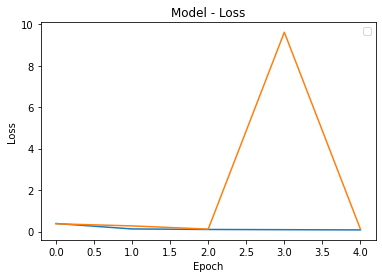

In [ ]:
model, history=network(x_train,y_train,x_test,y_test)
scores=model.evaluate((x_test),y_test,verbose=0)
print("Accuracy:",scores[1]*100)
print("F1 score:",scores[-1]*100)
evaluate_model(history, x_test, y_test, model)
y_pred = model.predict(x_test)

### 2) Confusion Matrix

[[967   0   2  22   9   0]
 [ 31 949   1   0  19   0]
 [ 10   0 979   2   9   0]
 [ 67   0   3 927   3   0]
 [  4   0   3   2 989   2]
 [  1   0   0   0   0 999]]


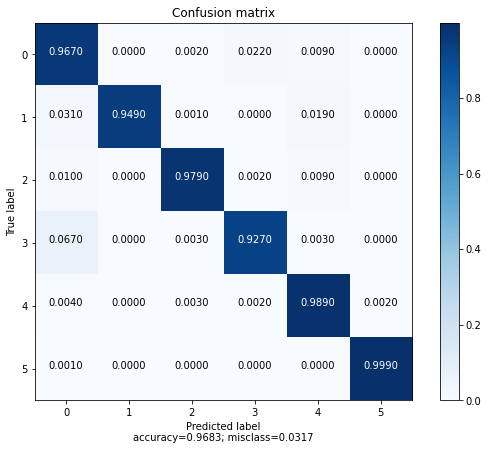

In [ ]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cnf_matrix, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix')